In [1]:
import pandas as pd

In [5]:
from datetime import datetime
import pandas as pd

# Read the CSV
df = pd.read_csv("../../data/KXSONGSONCHARTTSWIFT2-25OCT252025-10-19_OHLC.csv")
# df_market = pd.read_csv("/content/binary_markets_2025-10-18T02.csv")

# df_market.iloc[0]
df

,market_ticker,date,ask_open,ask_high,ask_low,ask_close,bid_open,bid_high,bid_low,bid_close,volume
0,KXSONGSONCHARTTSWIFT2-25OCT25,2025-10-16 14:16:00,1.00,1.00,0.90,0.90,0.50,0.50,0.50,0.50,0
1,KXSONGSONCHARTTSWIFT2-25OCT25,2025-10-16 14:17:00,0.90,0.90,0.90,0.90,0.50,0.50,0.15,0.15,0
2,KXSONGSONCHARTTSWIFT2-25OCT25,2025-10-16 14:18:00,0.90,0.90,0.90,0.90,0.15,0.15,0.15,0.15,0
3,KXSONGSONCHARTTSWIFT2-25OCT25,2025-10-16 14:22:00,0.90,0.90,0.81,0.81,0.15,0.73,0.15,0.73,0
4,KXSONGSONCHARTTSWIFT2-25OCT25,2025-10-16 14:26:00,0.81,0.90,0.79,0.90,0.73,0.73,0.10,0.10,822
...,...,...,...,...,...,...,...,...,...,...,...
2514,KXSONGSONCHARTTSWIFT2-25OCT25,2025-10-19 20:32:00,0.22,0.22,0.22,0.22,0.19,0.19,0.16,0.18,21
2515,KXSONGSONCHARTTSWIFT2-25OCT25,2025-10-19 20:33:00,0.22,0.22,0.22,0.22,0.18,0.20,0.16,0.20,43
2516,KXSONGSONCHARTTSWIFT2-25OCT25,2025-10-19 20:37:00,0.22,0.22,0.22,0.22,0.20,0.20,0.20,0.20,0
2517,KXSONGSONCHARTTSWIFT2-25OCT25,2025-10-19 20:40:00,0.22,0.22,0.22,0.22,0.20,0.20,0.16,0.19,129


/tmp/ipykernel_14690/2628467941.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


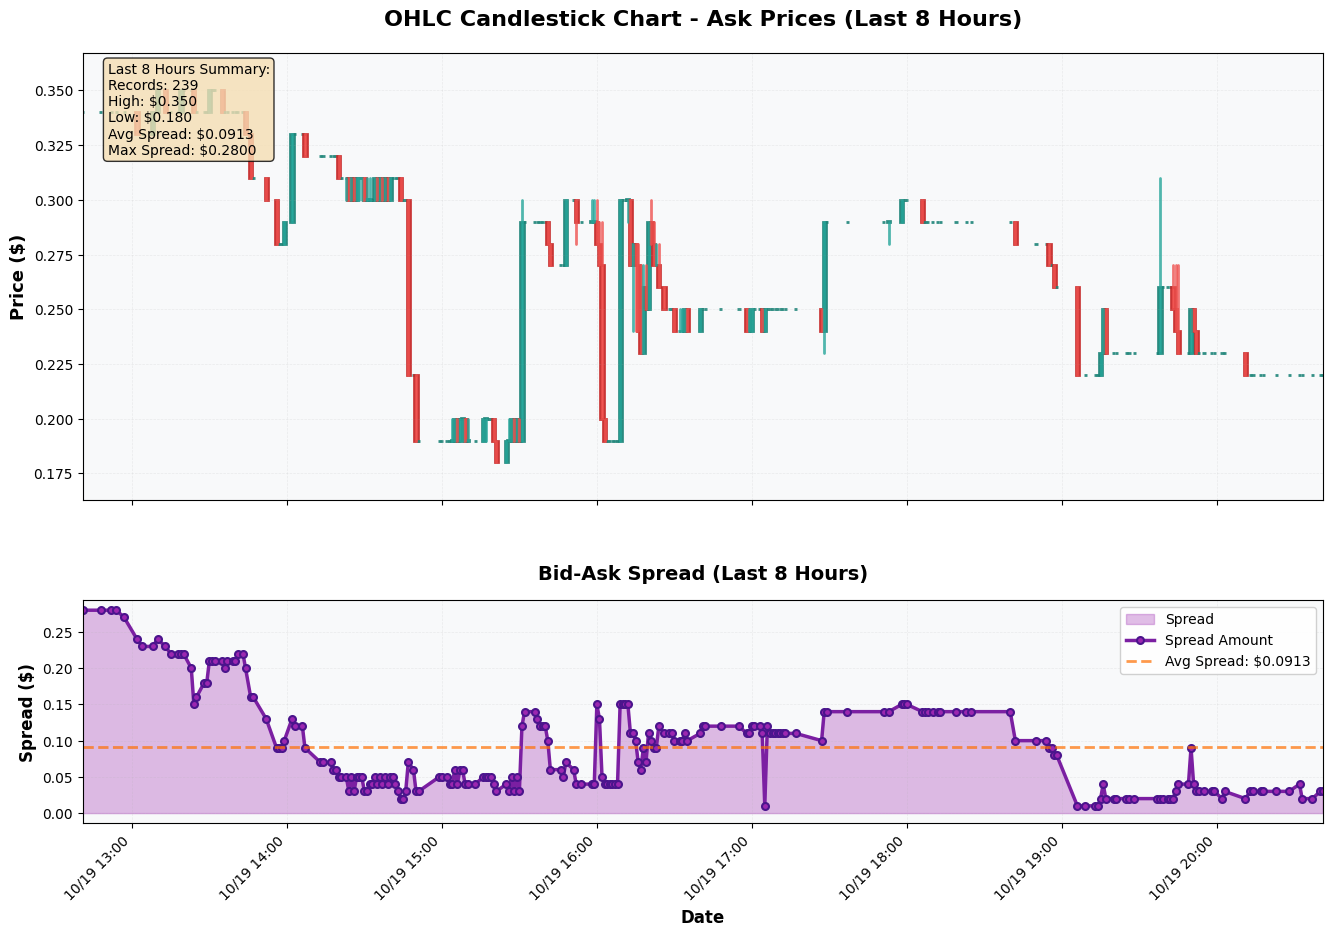

In [7]:
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.patches import Rectangle
import numpy as np



# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# Calculate spread and mid price
df['spread'] = df['ask_close'] - df['bid_close']
df['spread_pct'] = (df['spread'] / df['bid_close']) * 100
df['mid_price'] = (df['ask_close'] + df['bid_close']) / 2

# Get last 8 hours of data
last_date = df['date'].max()
eight_hours_ago = last_date - timedelta(hours=8)
df_last_8hrs = df[df['date'] >= eight_hours_ago].copy()

# Create figure with subplots - 2 subplots for OHLC and Spread
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(2, 1, height_ratios=[2, 1], hspace=0.3)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex=ax1)

# ========== OHLC Chart (Ask Prices) - Last 8 Hours ==========
ax1.set_title('OHLC Candlestick Chart - Ask Prices (Last 8 Hours)', fontsize=16, fontweight='bold', pad=20)
ax1.set_ylabel('Price ($)', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.2, linestyle='--', linewidth=0.5)
ax1.set_facecolor('#f8f9fa')

# Calculate dynamic candle width based on data density
if len(df_last_8hrs) > 1:
    date_nums = mdates.date2num(df_last_8hrs['date'].values)
    avg_gap = np.mean(np.diff(date_nums))
    width = avg_gap * 0.6  # 60% of average gap
else:
    width = 0.6

# Plot OHLC candlesticks for last 8 hours
for idx, row in df_last_8hrs.iterrows():
    x = mdates.date2num(row['date'])

    # Determine color (green if close >= open, red otherwise)
    is_bullish = row['ask_close'] >= row['ask_open']
    if is_bullish:
        wick_color = '#26a69a'  # Teal green
        body_color = '#26a69a'
        edge_color = '#1d8478'
    else:
        wick_color = '#ef5350'  # Red
        body_color = '#ef5350'
        edge_color = '#c62828'

    # Draw high-low wick (thinner line)
    ax1.plot([x, x], [row['ask_low'], row['ask_high']],
             color=wick_color, linewidth=2, alpha=0.8, solid_capstyle='round')

    # Draw open-close body
    height = abs(row['ask_close'] - row['ask_open'])
    bottom = min(row['ask_open'], row['ask_close'])

    # Handle doji candles (open == close)
    if height == 0:
        height = (row['ask_high'] - row['ask_low']) * 0.02  # Small height for visibility

    rect = Rectangle((x - width/2, bottom), width, height,
                     facecolor=body_color, edgecolor=edge_color,
                     linewidth=2, alpha=0.9)
    ax1.add_patch(rect)

# Add price range info
price_range = df_last_8hrs['ask_high'].max() - df_last_8hrs['ask_low'].min()
ax1.set_ylim(df_last_8hrs['ask_low'].min() - price_range*0.1,
             df_last_8hrs['ask_high'].max() + price_range*0.1)

# Set x-axis limits
ax1.set_xlim(mdates.date2num(eight_hours_ago), mdates.date2num(last_date))

# Add summary statistics text box for last 8 hours
stats_text = f'Last 8 Hours Summary:\n'
stats_text += f'Records: {len(df_last_8hrs)}\n'
stats_text += f'High: ${df_last_8hrs["ask_high"].max():.3f}\n'
stats_text += f'Low: ${df_last_8hrs["ask_low"].min():.3f}\n'
stats_text += f'Avg Spread: ${df_last_8hrs["spread"].mean():.4f}\n'
stats_text += f'Max Spread: ${df_last_8hrs["spread"].max():.4f}'

props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax1.text(0.02, 0.98, stats_text, transform=ax1.transAxes,
         fontsize=10, verticalalignment='top', bbox=props)

# ========== Spread Chart - Last 8 Hours ==========
ax2.set_title('Bid-Ask Spread (Last 8 Hours)', fontsize=14, fontweight='bold', pad=15)
ax2.set_xlabel('Date', fontsize=12, fontweight='bold')
ax2.set_ylabel('Spread ($)', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.2, linestyle='--', linewidth=0.5)
ax2.set_facecolor('#f8f9fa')

# Plot spread as filled area with gradient effect
ax2.fill_between(df_last_8hrs['date'], 0, df_last_8hrs['spread'],
                 alpha=0.3, color='#9c27b0', label='Spread')
ax2.plot(df_last_8hrs['date'], df_last_8hrs['spread'],
         color='#7b1fa2', linewidth=2.5, marker='o',
         markersize=5, markerfacecolor='#9c27b0',
         markeredgecolor='#4a148c', markeredgewidth=1.5,
         label='Spread Amount')

# Add horizontal line for average spread
avg_spread = df_last_8hrs['spread'].mean()
ax2.axhline(y=avg_spread, color='#ff6f00', linestyle='--',
           linewidth=2, alpha=0.7, label=f'Avg Spread: ${avg_spread:.4f}')

ax2.legend(loc='best', framealpha=0.9, fontsize=10)

# Format x-axis dates for all subplots
for ax in [ax1, ax2]:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())

# Only show x-labels on bottom plot
plt.setp(ax1.get_xticklabels(), visible=False)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

/tmp/ipykernel_14690/1641054982.py:147: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


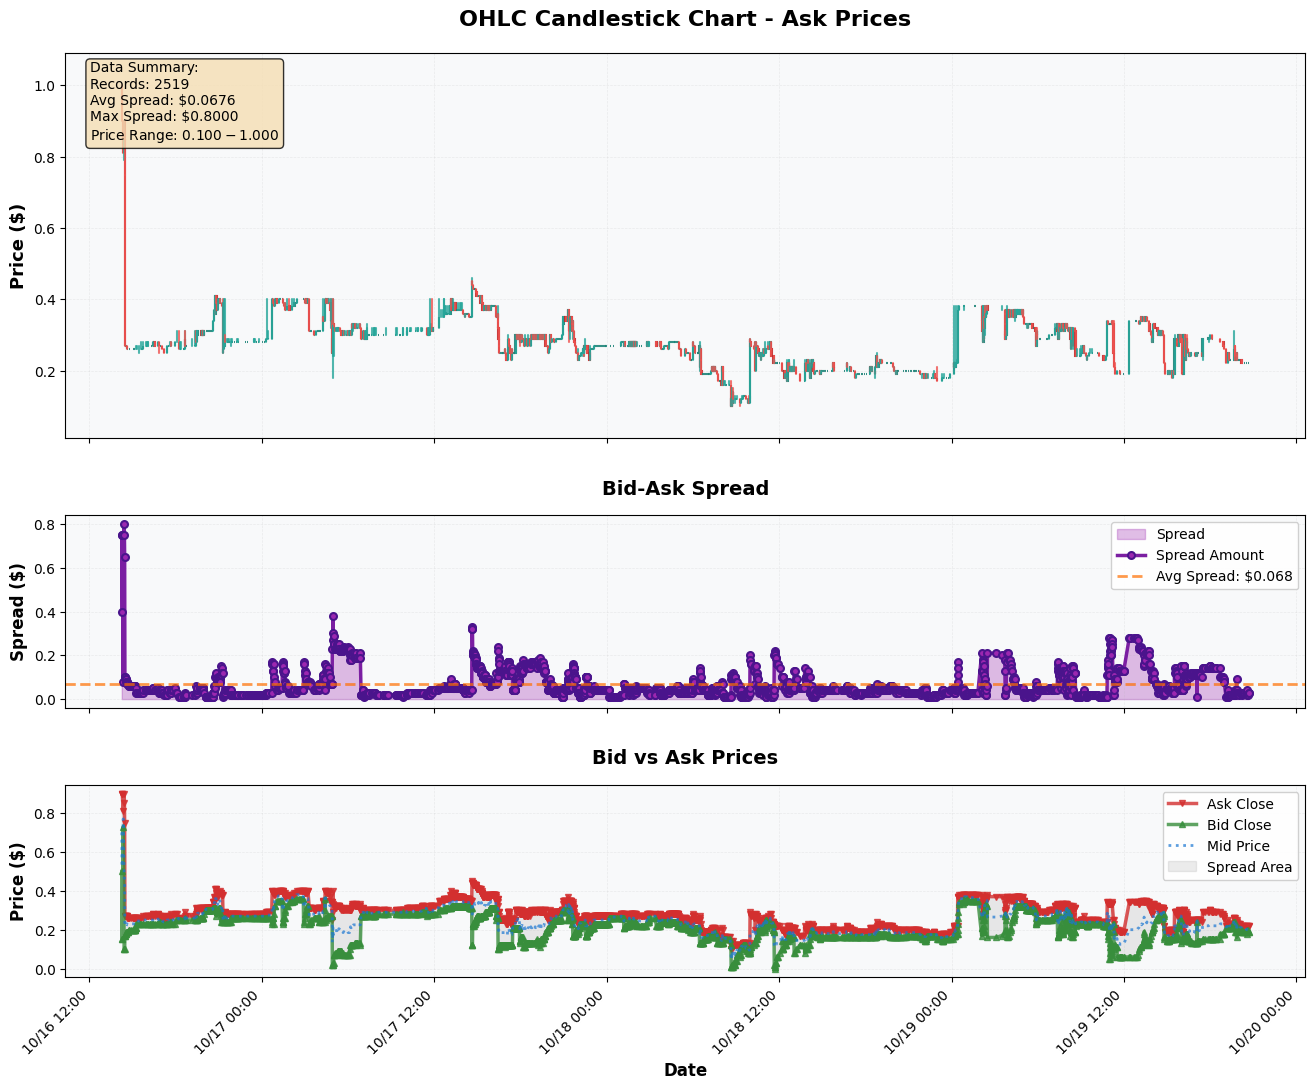

In [8]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.patches import Rectangle
import numpy as np

# Assuming df is already loaded with your data
# df = pd.read_csv("/content/2025-10-18_OHLC.csv")

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# Calculate spread and mid price
df['spread'] = df['ask_close'] - df['bid_close']
df['spread_pct'] = (df['spread'] / df['bid_close']) * 100
df['mid_price'] = (df['ask_close'] + df['bid_close']) / 2

# Create figure with subplots - adjusted height ratio
fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 1, height_ratios=[2, 1, 1], hspace=0.3)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex=ax1)
ax3 = fig.add_subplot(gs[2], sharex=ax1)

# ========== OHLC Chart (Ask Prices) ==========
ax1.set_title('OHLC Candlestick Chart - Ask Prices', fontsize=16, fontweight='bold', pad=20)
ax1.set_ylabel('Price ($)', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.2, linestyle='--', linewidth=0.5)
ax1.set_facecolor('#f8f9fa')

# Calculate dynamic candle width based on data density
date_nums = mdates.date2num(df['date'].values)
if len(date_nums) > 1:
    avg_gap = np.mean(np.diff(date_nums))
    width = avg_gap * 0.6  # 60% of average gap
else:
    width = 0.6

# Plot OHLC candlesticks with improved styling
for idx, row in df.iterrows():
    x = mdates.date2num(row['date'])

    # Determine color (green if close >= open, red otherwise)
    is_bullish = row['ask_close'] >= row['ask_open']
    if is_bullish:
        wick_color = '#26a69a'  # Teal green
        body_color = '#26a69a'
        edge_color = '#1d8478'
    else:
        wick_color = '#ef5350'  # Red
        body_color = '#ef5350'
        edge_color = '#c62828'

    # Draw high-low wick (thinner line)
    ax1.plot([x, x], [row['ask_low'], row['ask_high']],
             color=wick_color, linewidth=1.5, alpha=0.8, solid_capstyle='round')

    # Draw open-close body
    height = abs(row['ask_close'] - row['ask_open'])
    bottom = min(row['ask_open'], row['ask_close'])

    # Handle doji candles (open == close)
    if height == 0:
        height = (row['ask_high'] - row['ask_low']) * 0.02  # Small height for visibility

    rect = Rectangle((x - width/2, bottom), width, height,
                     facecolor=body_color, edgecolor=edge_color,
                     linewidth=1.5, alpha=0.9)
    ax1.add_patch(rect)

# Add price range info
price_range = df['ask_high'].max() - df['ask_low'].min()
ax1.set_ylim(df['ask_low'].min() - price_range*0.1,
             df['ask_high'].max() + price_range*0.1)

# ========== Spread Chart ==========
ax2.set_title('Bid-Ask Spread', fontsize=14, fontweight='bold', pad=15)
ax2.set_ylabel('Spread ($)', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.2, linestyle='--', linewidth=0.5)
ax2.set_facecolor('#f8f9fa')

# Plot spread as filled area with gradient effect
ax2.fill_between(df['date'], 0, df['spread'],
                 alpha=0.3, color='#9c27b0', label='Spread')
ax2.plot(df['date'], df['spread'],
         color='#7b1fa2', linewidth=2.5, marker='o',
         markersize=5, markerfacecolor='#9c27b0',
         markeredgecolor='#4a148c', markeredgewidth=1.5,
         label='Spread Amount')

# Add horizontal line for average spread
avg_spread = df['spread'].mean()
ax2.axhline(y=avg_spread, color='#ff6f00', linestyle='--',
           linewidth=2, alpha=0.7, label=f'Avg Spread: ${avg_spread:.3f}')

ax2.legend(loc='best', framealpha=0.9, fontsize=10)

# ========== Bid vs Ask Comparison ==========
ax3.set_title('Bid vs Ask Prices', fontsize=14, fontweight='bold', pad=15)
ax3.set_xlabel('Date', fontsize=12, fontweight='bold')
ax3.set_ylabel('Price ($)', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.2, linestyle='--', linewidth=0.5)
ax3.set_facecolor('#f8f9fa')

# Plot ask and bid close prices
ax3.plot(df['date'], df['ask_close'],
         color='#d32f2f', linewidth=2.5, marker='v',
         markersize=4, label='Ask Close', alpha=0.8)
ax3.plot(df['date'], df['bid_close'],
         color='#388e3c', linewidth=2.5, marker='^',
         markersize=4, label='Bid Close', alpha=0.8)

# Add mid price
ax3.plot(df['date'], df['mid_price'],
         color='#1976d2', linewidth=2, linestyle=':',
         label='Mid Price', alpha=0.7)

# Fill area between bid and ask
ax3.fill_between(df['date'], df['bid_close'], df['ask_close'],
                 alpha=0.15, color='gray', label='Spread Area')

ax3.legend(loc='best', framealpha=0.9, fontsize=10)

# Format x-axis dates for all subplots
for ax in [ax1, ax2, ax3]:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())

# Only show x-labels on bottom plot
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.xticks(rotation=45, ha='right')

# Add summary statistics text box
stats_text = f'Data Summary:\n'
stats_text += f'Records: {len(df)}\n'
stats_text += f'Avg Spread: ${df["spread"].mean():.4f}\n'
stats_text += f'Max Spread: ${df["spread"].max():.4f}\n'
stats_text += f'Price Range: ${df["ask_low"].min():.3f} - ${df["ask_high"].max():.3f}'

props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax1.text(0.02, 0.98, stats_text, transform=ax1.transAxes,
         fontsize=10, verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

z

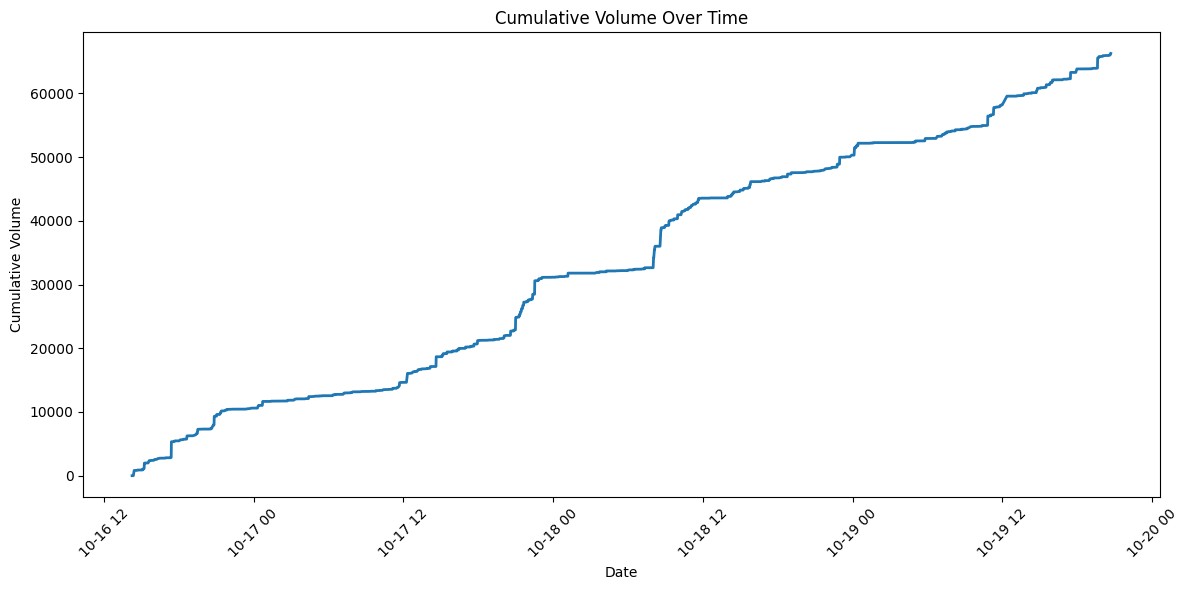

In [9]:

df['date'] = pd.to_datetime(df['date'])

df = df.sort_values('date')

df['cumulative_volume'] = df['volume'].cumsum()

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['cumulative_volume'], linewidth=2)

plt.xlabel('Date')
plt.ylabel('Cumulative Volume')
plt.title('Cumulative Volume Over Time')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

## Market Making Assumptions

**Base Assumption: Single Round Trip per Expiration**

This backtester assumes 1 complete round trip (buy + sell) per expiration window,
capturing the bid-ask spread once per contract.

**Profit = Ask Price - Bid Price**

This is a conservative estimate - active market makers typically achieve multiple
round trips. This model does not account for adverse selection or partial fills.

In [19]:
def strategy1(df):
    my_ask = 0
    my_bid = 0
    profit = [0]
    asks = [0]
    bids = [0]
    for row in df.itertuples():
        if row.Index != 0:
            profit.append((my_ask - my_bid)*3)
            asks.append(my_ask)
            bids.append(my_bid)
        my_ask = row.ask_close - 0.01
        my_bid = row.bid_close - 0.01

    df['profit'] = profit
    df['my_ask'] = asks
    df['my_bid'] = bids



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


strategy1(df)


df['cumulative_profit'] = df[''].cumsum()
df['cumulative_cost'] = df['my_bid'].cumsum()
df['cumulative_revenue'] = df['my_ask'].cumsum()

total_profit = df['cumulative_profit'].iloc[-1]
total_cost = df['cumulative_cost'].iloc[-1]
total_revenue = df['cumulative_revenue'].iloc[-1]

print(f"Total Contracts Traded: {len(df)}")
print(f"Total Cost: ${total_cost}")
print(f"Total Revenue: ${total_revenue}")
print(f"Total Profit: ${total_profit}")
print(f"Average Profit per Expiration: ${df['profit'].mean():.2f}")
print(f"Best Trade: ${df['profit'].max():.2f}")
print(f"Worst Trade: ${df['profit'].min():.2f}")

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 14))

ax1.plot(df['date'], df['cumulative_revenue'], linewidth=2, color='blue', label='Revenue')
ax1.plot(df['date'], df['cumulative_cost'], linewidth=2, color='red', label='Cost')
ax1.fill_between(df['date'], df['cumulative_cost'], df['cumulative_revenue'],
                  alpha=0.3, color='green', label='Profit')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Cumulative Amount ($)', fontsize=12)
ax1.set_title(f'Cost: ${total_cost:.2f} | Revenue: ${total_revenue:.2f} | Profit: ${total_profit:.2f}',
              fontsize=14, fontweight='bold')
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

ax2.plot(df['date'], df['cumulative_profit'], linewidth=2, color='green')
ax2.fill_between(df['date'], 0, df['cumulative_profit'], alpha=0.3, color='green')
ax2.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('Cumulative Profit ($)', fontsize=12)
ax2.set_title(f'Total Profit: ${total_profit:.2f}', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')


plt.tight_layout()
plt.show()

KeyError: ''